In [1]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import warnings
import xgboost
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
pd.set_option('display.max_columns', None)
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import numpy as np

In [3]:
data = pd.read_csv("../data/aggregated_numeric_data.csv",decimal=".",sep=";",index_col=0).reset_index(level=['local_time'])
data["local_time"] = pd.to_datetime(data["local_time"])

[Timestamp('2022-04-26 13:34:00'), Timestamp('2022-04-28 12:53:00'), Timestamp('2022-04-28 22:43:00'), Timestamp('2022-04-29 10:37:00'), Timestamp('2022-05-03 20:18:00'), Timestamp('2022-05-05 01:13:00'), Timestamp('2022-05-07 22:09:00'), Timestamp('2022-05-08 18:21:00'), Timestamp('2022-05-10 03:46:00'), Timestamp('2022-05-13 03:52:00'), Timestamp('2022-05-13 20:51:00'), Timestamp('2022-05-17 12:26:00'), Timestamp('2022-05-17 14:00:00'), Timestamp('2022-05-17 15:08:00'), Timestamp('2022-05-17 20:03:00'), Timestamp('2022-05-18 11:40:00'), Timestamp('2022-05-18 15:51:00'), Timestamp('2022-05-21 04:06:00'), Timestamp('2022-05-24 10:28:00'), Timestamp('2022-05-27 14:18:00'), Timestamp('2022-05-30 15:45:00'), Timestamp('2022-05-31 03:45:00'), Timestamp('2022-05-31 18:21:00'), Timestamp('2022-05-31 19:55:00'), Timestamp('2022-06-05 09:56:00'), Timestamp('2022-06-06 00:58:00'), Timestamp('2022-06-08 16:41:00'), Timestamp('2022-06-13 20:43:00'), Timestamp('2022-06-18 17:54:00'), Timestamp('20

,local_time,product_code [None],production_order_code [None],Abzug Flachlegung [mm],Abzug Zentralführung [mm],Anlage Stillstandsgrund [-],Auftrag Länge (Soll) [m],Außenluft 1 [%],Bahngeschwindigkeit [m/min],Blaskopf Zone 1 Temperatur (Soll) [°C],Blaskopf Zone 1 Temperatur [°C],Blaskopf Zone 10 Temperatur (Soll) [°C],Blaskopf Zone 10 Temperatur [°C],Blaskopf Zone 2 Temperatur (Soll) [°C],Blaskopf Zone 2 Temperatur [°C],Blaskopf Zone 3 Temperatur (Soll) [°C],Blaskopf Zone 3 Temperatur [°C],Blaskopf Zone 4 Temperatur (Soll) [°C],Blaskopf Zone 4 Temperatur [°C],Blaskopf Zone 5 Temperatur (Soll) [°C],Blaskopf Zone 5 Temperatur [°C],Blaskopf Zone 6 Temperatur (Soll) [°C],Blaskopf Zone 6 Temperatur [°C],Blaskopf Zone 7 Temperatur (Soll) [°C],Blaskopf Zone 7 Temperatur [°C],Blaskopf Zone 8 Temperatur (Soll) [°C],Blaskopf Zone 8 Temperatur [°C],Blaskopf Zone 9 Temperatur (Soll) [°C],Blaskopf Zone 9 Temperatur [°C],Breite (Soll) [mm],Breite [mm],Dickenmessung Zentrierbetrag (diagonal) [%],Dickenmessung Zentrierrichtung (diagonal) [°],Druckluftverbrauch (Soll) [Nm3/h],Druckluftverbrauch [Nm3/h],Durchsatz (Soll) [kg/h],Durchsatz [kg/h],Elektrische Leistung Gesamt [kW],Extruder A AF1 Temperatur (Soll) [°C],Extruder A AF1 Temperatur [°C],Extruder A Dicke (Soll) [µm],Extruder A Drehzahl [1/min],Extruder A Durchsatz [kg/h],Extruder A Förderrate [kg/U/min],Extruder A HK Anteil ( Soll) [%],Extruder A HK Anteil [%],Extruder A HK Dichte [g/ccm],Extruder A HK Durchsatz [kg/h],Extruder A Laufmetergewicht [g/m],Extruder A Massedruck [bar],Extruder A Massetemperatur [°C],Extruder A Motorstrom [A],Extruder A NK 1 Anteil (Soll) [%],Extruder A NK 1 Anteil [%],Extruder A NK 1 Ausstoß maximal (Soll) [kg/h],Extruder A NK 1 Drehzahl [1/min],Extruder A NK 1 Durchsatz [kg/h],Extruder A NK 2 Anteil (Soll) [%],Extruder A NK 2 Anteil [%],Extruder A NK 2 Ausstoß maximal (Soll) [kg/h],Extruder A NK 2 Drehzahl [1/min],Extruder A NK 2 Durchsatz [kg/h],Extruder A NK 3 Anteil (Soll) [%],Extruder A NK 3 Anteil [%],Extruder A NK 3 Ausstoß maximal (Soll) [kg/h],Extruder A NK 3 Drehzahl [1/min],Extruder A NK 3 Durchsatz [kg/h],Extruder A NK 4 Anteil (Soll) [%],Extruder A NK 4 Anteil [%],Extruder A NK 4 Ausstoß maximal (Soll) [kg/h],Extruder A NK 4 Drehzahl [1/min],Extruder A NK 4 Durchsatz [kg/h],Extruder A NK 5 Anteil (Soll) [%],Extruder A NK 5 Anteil [%],Extruder A NK 5 Ausstoß maximal (Soll) [kg/h],Extruder A NK 5 Drehzahl [1/min],Extruder A NK 5 Durchsatz [kg/h],Extruder A NK1 Dichte [g/ccm],Extruder A NK1 Förderrate [kg/U/min],Extruder A NK2 Dichte [g/ccm],Extruder A NK2 Förderrate [kg/U/min],Extruder A NK3 Dichte [g/ccm],Extruder A NK3 Förderrate [kg/U/min],Extruder A NK4 Dichte [g/ccm],Extruder A NK4 Förderrate [kg/U/min],Extruder A NK5 Dichte [g/ccm],Extruder A NK5 Förderrate [kg/U/min],Extruder A Nutmutter Temperatur (Soll) [°C],Extruder A Nutmutter Temperatur [°C],Extruder A Schichtdicke [µm],Extruder A Siebwechsler Temperatur (Soll) [°C],Extruder A Siebwechsler Temperatur [°C],Extruder A Zone 1 Temperatur (Soll) [°C],Extruder A Zone 1 Temperatur [°C],Extruder A Zone 2 Temperatur (Soll) [°C],Extruder A Zone 2 Temperatur [°C],Extruder A Zone 3 Temperatur (Soll) [°C],Extruder A Zone 3 Temperatur [°C],Extruder A Zone 4 Temperatur (Soll) [°C],Extruder A Zone 4 Temperatur [°C],Extruder B AF1 Temperatur (Soll) [°C],Extruder B AF1 Temperatur [°C],Extruder B Dicke (Soll) [µm],Extruder B Drehzahl [1/min],Extruder B Durchsatz [kg/h],Extruder B Förderrate [kg/U/min],Extruder B HK Anteil (Soll) [%],Extruder B HK Anteil [%],Extruder B HK Dichte [g/ccm],Extruder B HK Durchsatz [kg/h],Extruder B Laufmetergewicht [g/m],Extruder B Massedruck [bar],Extruder B Massetemperatur [°C],Extruder B Motorstrom [A],Extruder B NK 1 Anteil (Soll) [%],Extruder B NK 1 Anteil [%],Extruder B NK 1 Ausstoß maximal (Soll) [kg/h],Extruder B NK 1 Drehzahl [1/min],Extruder B NK 1 Durchsatz [kg/h],Extruder B NK 2 Anteil (Soll) [%],Extruder B NK 2 Anteil [%],Extruder B NK 2 Ausstoß maximal (Soll) [kg/h]

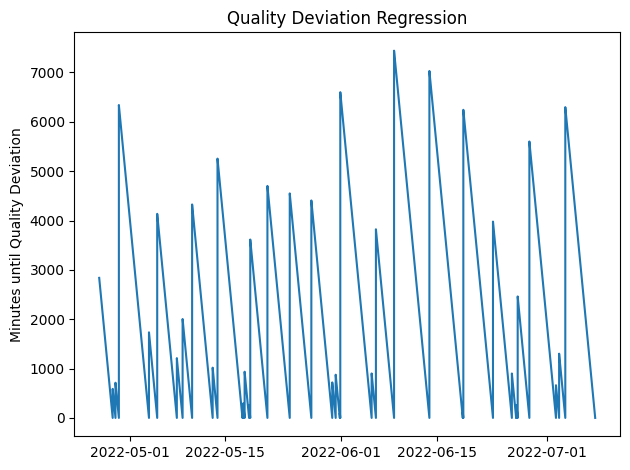

In [4]:
'''Add the RUL days'''
# Load Failure timestamps
failure_timestamps =  pd.read_csv("../data/timestamps_three_sigma.csv")
failure_timestamps = failure_timestamps["local_time"]
#failure_timestamps = ["2022-04-25","2022-05-04","2022-05-24","2022-05-29","2022-06-14"]


# 1.) Convert zero_days to datetime objects
failure_timestamps = [pd.Timestamp(day) for day in failure_timestamps]
print(failure_timestamps)



data["Date"] = pd.to_datetime(data["local_time"]).dt.floor("min")

# Create copy of original, aggregated data
merged_data = data


dfs = []

# 2.) Calculate remaining days-hours-minutes for each row
# uncomment depending on wished function
all_dates = pd.DataFrame()
dfs = []
nr_of_failures = len(failure_timestamps)
for index,end_day in enumerate(failure_timestamps[:nr_of_failures-1]):
    #day_list = pd.date_range(start=zero_days[index], end=zero_days[index+1],inclusive="right").to_list()
    #hour_list = pd.date_range(start=failure_timestamps[index], end=failure_timestamps[index+1],inclusive="right",freq='H')
    minute_list = pd.date_range(start=failure_timestamps[index], end=failure_timestamps[index+1],inclusive="right",freq='min')

    #remaining_days = [(zero_days[index+1] - day).hour for day in day_list]
    #remaining_hours = [(failure_timestamps[index+1] - hour).total_seconds() // 3600 for hour in hour_list]
    remaining_minutes = [(failure_timestamps[index+1] - minute).total_seconds() // 60 for minute in minute_list]

    # Replace with respective list and RUL corresponding to liens before
    df = pd.DataFrame({'Date': minute_list, 'RUL': remaining_minutes})

    dfs.append(df)

all_dates = pd.concat(dfs)

all_dates["Date"] = pd.to_datetime(all_dates["Date"]).dt.floor("min")
all_dates["Date"].to_list()

# 3.) merge RUL table with original table, the transformation before must be done 
# to convert the Date row to the correct format
merged_data = pd.merge(merged_data,all_dates,on="Date")


# Plot rul
plt.plot(merged_data["Date"],merged_data["RUL"])
plt.ylabel("Minutes until Quality Deviation")
plt.title("Quality Deviation Regression")
plt.tight_layout()
plt.savefig("rul_quality.png")
plt.show
print(merged_data.shape)
merged_data.columns.to_frame().T
#print(clean_merged.columns)

In [ ]:
##################### Linear correlation ###############
# Compute the correlation matrix
correlation_matrix = data.corr()

# Get the correlation with the target column (assuming 'target_column' is the name of the target column)
target_correlation = correlation_matrix["Folienprofil 3-Sigma [%]"]

# Sort the correlations based on their absolute values in descending order
sorted_correlations = target_correlation.abs().sort_values(ascending=False)

# Print the columns with the greatest correlation to the target column
top_correlated_columns = sorted_correlations.index[1:50] # Exclude the target column itself

print(type(top_correlated_columns))

In [46]:
############ Spearmen correlation ############################
import numpy as np
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score
from scipy.stats import spearmanr

all_columns_minus_rul = list(merged_data.columns)
all_columns_minus_rul.remove("RUL")
all_columns_minus_rul.remove("local_time")
all_columns_minus_rul.remove("Date")
y = merged_data["RUL"]
print(all_columns_minus_rul)

# Calculate Spearman's rank correlation coefficient

correlation, p_value = spearmanr(merged_data[all_columns_minus_rul], y)
correlation_df = pd.DataFrame(correlation, columns=all_columns_minus_rul+["RUL"])

abs_corr_values  = correlation_df.abs()

sorted_features = abs_corr_values["RUL"].sort_values(ascending=False)

print(sorted_features)

top_twenty_feature_names = correlation_df.columns[sorted_features.head(50).index]

print("Top twenty correlated features:")
print(top_twenty_feature_names)

''' Result is very bad, highest correlation to RUL is 0.10'''

['product_code [None]', 'production_order_code [None]', 'Abzug Flachlegung [mm]', 'Abzug Zentralführung [mm]', 'Anlage Stillstandsgrund [-]', 'Auftrag Länge (Soll) [m]', 'Außenluft 1 [%]', 'Bahngeschwindigkeit [m/min]', 'Blaskopf Zone 1 Temperatur (Soll) [°C]', 'Blaskopf Zone 1 Temperatur [°C]', 'Blaskopf Zone 10 Temperatur (Soll) [°C]', 'Blaskopf Zone 10 Temperatur [°C]', 'Blaskopf Zone 2 Temperatur (Soll) [°C]', 'Blaskopf Zone 2 Temperatur [°C]', 'Blaskopf Zone 3 Temperatur (Soll) [°C]', 'Blaskopf Zone 3 Temperatur [°C]', 'Blaskopf Zone 4 Temperatur (Soll) [°C]', 'Blaskopf Zone 4 Temperatur [°C]', 'Blaskopf Zone 5 Temperatur (Soll) [°C]', 'Blaskopf Zone 5 Temperatur [°C]', 'Blaskopf Zone 6 Temperatur (Soll) [°C]', 'Blaskopf Zone 6 Temperatur [°C]', 'Blaskopf Zone 7 Temperatur (Soll) [°C]', 'Blaskopf Zone 7 Temperatur [°C]', 'Blaskopf Zone 8 Temperatur (Soll) [°C]', 'Blaskopf Zone 8 Temperatur [°C]', 'Blaskopf Zone 9 Temperatur (Soll) [°C]', 'Blaskopf Zone 9 Temperatur [°C]', 'Breite 

C:\Users\fassb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\lib\function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\fassb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


' Result is very bad, highest correlation to RUL is 0.10'

In [5]:
# Do various other transformations of the training data, f.I. choose only specific columns
# Read important columns
columns_granger = pd.read_csv("cross_correlation_df.csv")
columns_granger = columns_granger["index"].to_list()
columns_granger.remove("RUL")
print(columns_granger)
merged_data_final = merged_data
columns = []
#columns = [x for x in merged_data.columns if "kW" in x]
#columns = [x for x in merged_data.columns if "Extruder" in x]
#columns = columns + ["Bahngeschwindigkeit [m/min]","RUL","Date","local_time"]
columns = ["Druckluftverbrauch [Nm3/h]","Extruder B Motorstrom [A]","Extruder B Massedruck [bar]","Extruder B Massetemperatur [°C]",
                       "Extruder A Motorstrom [A]","Extruder A Massedruck [bar]","Extruder A Massetemperatur [°C]",
                       "Extruder C Motorstrom [A]","Extruder C Massedruck [bar]","Extruder C Massetemperatur [°C]","Leistung [kW]","Mittelwert Foliendicke [µm]","Prozessabwärme [kW]",
                       "Spezifische Energie gesamt [kWh/kg]","Wobble Median [mm]","Wärmetauscher Kühlleistung [kW]","Durchsatz [kg/h]","product_code [None]","Date","RUL"]
columns2 = []


merged_data_final = merged_data[columns_granger[0:20]+["Date","RUL"]]
print(merged_data_final.shape)

''' Clean datasets for training '''
merged_data_final.rename(columns=lambda x: x.replace('[', '').replace(']', ''), inplace=True)


'''Only look at last 5hrs before spike'''
#merged_data_final = merged_data_final[merged_data_final["RUL"] <= 900]
#plt.plot(merged_data_final["RUL"])

''' Create Validation set consisting of last cycle in which '''
last_cycle = merged_data_final[merged_data_final["Date"] > '2022-06-13 14:00:00']
#last_cycle

''' Create Train set consisting of all data before '''
first_cycles = merged_data_final[merged_data_final["Date"] <= '2022-06-13 14:00:00']
#first_cycles.shape

#####################################################################
''' Create Validation set consisting of one product_code of a test cluster'''
''' Take the RUL curve out of the test-cluster '''
cluster1 = [94107836, 94163716, 94165248, 94165975, 94169548]
cluster = [94102432, 94105895, 94106158, 94161726]
cluster2 = [58210900, 94705967]
cluster3 = [94161275, 94164422, 94168168]
cluster3_1 = [94169716]
cluster18 = [94166971, 94167800,94167600,94167939,94168028,94168102,94169474]
cluster18_1 = [94168028]
cluster12 = [94161880, 94165680, 94167205, 94167614, 94169868]

#last_cycle = merged_data_final[merged_data_final["product_code None"].isin(cluster18_1)]
#print(last_cycle.shape)

''' Create train set consisting of a test cluster minus 1 product_code'''
#first_cycles = merged_data_final[merged_data_final["product_code None"].isin(cluster18)]
first_cycles.shape

########################################################################

''' Clean those datasets for training '''
#first_cycles = first_cycles.drop("local_time",axis=1)
first_cycles = first_cycles.drop("Date",axis=1)

#last_cycle = last_cycle.drop("local_time",axis=1)
last_cycle = last_cycle.drop("Date",axis=1)

#merged_data_final = merged_data_final.drop("local_time",axis=1)
#merged_data_final = merged_data_final.drop("Date",axis=1)



['Reversierung Luftwendestange oben [%]', 'Reversierung Luftwendestange unten [%]', 'Profilregler Status [-]', 'Wickler A Anzahl Nutzen [-]', 'Extruder C NK4 Förderrate [kg/U/min]', 'Wickler B Anzahl Nutzen [-]', 'Extruder A NK 5 Ausstoß maximal (Soll) [kg/h]', 'Extruder C NK 4 Ausstoß maximal (Soll) [kg/h]', 'Extruder A Dicke (Soll) [µm]', 'Extruder B Dicke (Soll) [µm]', 'Foliendicke (Soll) [µm]', 'Extruder A NK 5 Drehzahl [1/min]', 'Extruder B NK4 Förderrate [kg/U/min]', 'Extruder B NK 1 Anteil (Soll) [%]', 'Extruder A NK 4 Ausstoß maximal (Soll) [kg/h]', 'Extruder C NK 1 Anteil (Soll) [%]', 'Reversierzeit [min]', 'Extruder C HK Anteil (Soll) [%]', 'Extruder A NK 5 Durchsatz [kg/h]', 'Extruder C NK 5 Durchsatz [kg/h]', 'Extruder C NK 5 Drehzahl [1/min]', 'Extruder C NK 1 Durchsatz [kg/h]', 'Extruder B NK1 Dichte [g/ccm]', 'Wickler A Anpresskraft (Soll) [N]', 'Wickler A Anlegewalze Kraft (Soll) [N]', 'Extruder B NK2 Förderrate [kg/U/min]', 'Extruder B NK 2 Ausstoß maximal (Soll) [kg/h

C:\Users\fassb\AppData\Local\Temp\ipykernel_4980\1132488026.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_final.rename(columns=lambda x: x.replace('[', '').replace(']', ''), inplace=True)


In [30]:
''' RUL prediction XG Boost'''

''' 1.) Split in train and testdata'''
y = first_cycles["RUL"]
X = first_cycles.drop("RUL",axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=12)

parameters = {'objective':['reg:squarederror'],
              'learning_rate': [0.05, 0.04],
              'max_depth': [6],
              'colsample_bytree': [0.5,0.6],
              'n_estimators': [450,500],
              'reg_lambda': [0]
             }

grid_search = GridSearchCV(
                        xgboost.XGBRegressor(),
                        parameters,
                        cv = 3,
                        refit=True, 
                        verbose=1)

model = xgboost.XGBRegressor(
    max_depth=3,
    learning_rate=0.1,
    n_estimators=500,
    objective='reg:squarederror',
    random_state=42
)

#%time grid_search.fit(X_train, y_train, eval_metric=["logloss"], eval_set=[(X_train, y_train),(X_valid, y_valid)])
model.fit(X_train, y_train)

#%time grid_search.fit(X_train, y_train, eval_metric=["rmse"], eval_set=[(X_train, y_train),(X_valid, y_valid)])
#%time grid_search.fit(X_train, y_train, eval_metric=["rmse"], eval_set=[(X_train, y_train), (X_val, y_val)])


#model = grid_search.best_estimator_
print(model)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[0]	validation_0-rmse:2709.54370	validation_1-rmse:2706.71011
[1]	validation_0-rmse:2586.15217	validation_1-rmse:2583.51138


C:\Users\fassb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:2463.16776	validation_1-rmse:2460.44548
[3]	validation_0-rmse:2347.68938	validation_1-rmse:2345.42034
[4]	validation_0-rmse:2236.71854	validation_1-rmse:2234.56416
[5]	validation_0-rmse:2135.78152	validation_1-rmse:2134.19658
[6]	validation_0-rmse:2039.94433	validation_1-rmse:2038.61258
[7]	validation_0-rmse:1945.37641	validation_1-rmse:1944.15538
[8]	validation_0-rmse:1855.84121	validation_1-rmse:1854.64628
[9]	validation_0-rmse:1774.78755	validation_1-rmse:1774.02991
[10]	validation_0-rmse:1696.64109	validation_1-rmse:1696.17116
[11]	validation_0-rmse:1620.16194	validation_1-rmse:1620.09909
[12]	validation_0-rmse:1551.48277	validation_1-rmse:1551.65711
[13]	validation_0-rmse:1480.94155	validation_1-rmse:1481.16960
[14]	validation_0-rmse:1412.24596	validation_1-rmse:1412.49926
[15]	validation_0-rmse:1352.95868	validation_1-rmse:1353.48697
[16]	validation_0-rmse:1296.83583	validation_1-rmse:1297.60727
[17]	validation_0-rmse:1240.10481	validation_1-rmse:1240.98467


C:\Users\fassb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:2462.79797	validation_1-rmse:2460.10813
[3]	validation_0-rmse:2347.49073	validation_1-rmse:2345.18266
[4]	validation_0-rmse:2235.59543	validation_1-rmse:2233.70413
[5]	validation_0-rmse:2134.14863	validation_1-rmse:2132.65934
[6]	validation_0-rmse:2037.08265	validation_1-rmse:2035.84397
[7]	validation_0-rmse:1942.58795	validation_1-rmse:1941.43108
[8]	validation_0-rmse:1853.54787	validation_1-rmse:1852.29201
[9]	validation_0-rmse:1772.42005	validation_1-rmse:1771.61264
[10]	validation_0-rmse:1691.68854	validation_1-rmse:1690.84153
[11]	validation_0-rmse:1614.52959	validation_1-rmse:1614.07568
[12]	validation_0-rmse:1544.77828	validation_1-rmse:1544.56390
[13]	validation_0-rmse:1474.76312	validation_1-rmse:1474.72370
[14]	validation_0-rmse:1406.26529	validation_1-rmse:1406.17123
[15]	validation_0-rmse:1346.34819	validation_1-rmse:1346.53106
[16]	validation_0-rmse:1290.26554	validation_1-rmse:1290.58997
[17]	validation_0-rmse:1233.57429	validation_1-rmse:1234.13943


C:\Users\fassb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:2462.96071	validation_1-rmse:2460.40819
[3]	validation_0-rmse:2348.13336	validation_1-rmse:2346.08049
[4]	validation_0-rmse:2236.01342	validation_1-rmse:2234.25014
[5]	validation_0-rmse:2134.69455	validation_1-rmse:2133.38364
[6]	validation_0-rmse:2037.56902	validation_1-rmse:2036.45314
[7]	validation_0-rmse:1943.12067	validation_1-rmse:1942.15229
[8]	validation_0-rmse:1853.90012	validation_1-rmse:1853.03608
[9]	validation_0-rmse:1772.99150	validation_1-rmse:1772.66834
[10]	validation_0-rmse:1692.61022	validation_1-rmse:1692.32404
[11]	validation_0-rmse:1615.37784	validation_1-rmse:1615.42784
[12]	validation_0-rmse:1545.86425	validation_1-rmse:1546.21426
[13]	validation_0-rmse:1475.14441	validation_1-rmse:1475.54267
[14]	validation_0-rmse:1407.21823	validation_1-rmse:1407.48292
[15]	validation_0-rmse:1347.34629	validation_1-rmse:1347.93249
[16]	validation_0-rmse:1288.87951	validation_1-rmse:1289.57326
[17]	validation_0-rmse:1232.74416	validation_1-rmse:1233.60923


C:\Users\fassb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:2463.16776	validation_1-rmse:2460.44548
[3]	validation_0-rmse:2347.68938	validation_1-rmse:2345.42034
[4]	validation_0-rmse:2236.71854	validation_1-rmse:2234.56416
[5]	validation_0-rmse:2135.78152	validation_1-rmse:2134.19658
[6]	validation_0-rmse:2039.94433	validation_1-rmse:2038.61258
[7]	validation_0-rmse:1945.37641	validation_1-rmse:1944.15538
[8]	validation_0-rmse:1855.84121	validation_1-rmse:1854.64628
[9]	validation_0-rmse:1774.78755	validation_1-rmse:1774.02991
[10]	validation_0-rmse:1696.64109	validation_1-rmse:1696.17116
[11]	validation_0-rmse:1620.16194	validation_1-rmse:1620.09909
[12]	validation_0-rmse:1551.48277	validation_1-rmse:1551.65711
[13]	validation_0-rmse:1480.94155	validation_1-rmse:1481.16960
[14]	validation_0-rmse:1412.24596	validation_1-rmse:1412.49926
[15]	validation_0-rmse:1352.95868	validation_1-rmse:1353.48697
[16]	validation_0-rmse:1296.83583	validation_1-rmse:1297.60727
[17]	validation_0-rmse:1240.10481	validation_1-rmse:1240.98467


C:\Users\fassb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:2462.79797	validation_1-rmse:2460.10813
[3]	validation_0-rmse:2347.49073	validation_1-rmse:2345.18266
[4]	validation_0-rmse:2235.59543	validation_1-rmse:2233.70413
[5]	validation_0-rmse:2134.14863	validation_1-rmse:2132.65934
[6]	validation_0-rmse:2037.08265	validation_1-rmse:2035.84397
[7]	validation_0-rmse:1942.58795	validation_1-rmse:1941.43108
[8]	validation_0-rmse:1853.54787	validation_1-rmse:1852.29201
[9]	validation_0-rmse:1772.42005	validation_1-rmse:1771.61264
[10]	validation_0-rmse:1691.68854	validation_1-rmse:1690.84153
[11]	validation_0-rmse:1614.52959	validation_1-rmse:1614.07568
[12]	validation_0-rmse:1544.77828	validation_1-rmse:1544.56390
[13]	validation_0-rmse:1474.76312	validation_1-rmse:1474.72370
[14]	validation_0-rmse:1406.26529	validation_1-rmse:1406.17123
[15]	validation_0-rmse:1346.34819	validation_1-rmse:1346.53106
[16]	validation_0-rmse:1290.26554	validation_1-rmse:1290.58997
[17]	validation_0-rmse:1233.57429	validation_1-rmse:1234.13943


C:\Users\fassb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:2462.96071	validation_1-rmse:2460.40819
[3]	validation_0-rmse:2348.13336	validation_1-rmse:2346.08049
[4]	validation_0-rmse:2236.01342	validation_1-rmse:2234.25014
[5]	validation_0-rmse:2134.69455	validation_1-rmse:2133.38364
[6]	validation_0-rmse:2037.56902	validation_1-rmse:2036.45314
[7]	validation_0-rmse:1943.12067	validation_1-rmse:1942.15229
[8]	validation_0-rmse:1853.90012	validation_1-rmse:1853.03608
[9]	validation_0-rmse:1772.99150	validation_1-rmse:1772.66834
[10]	validation_0-rmse:1692.61022	validation_1-rmse:1692.32404
[11]	validation_0-rmse:1615.37784	validation_1-rmse:1615.42784
[12]	validation_0-rmse:1545.86425	validation_1-rmse:1546.21426
[13]	validation_0-rmse:1475.14441	validation_1-rmse:1475.54267
[14]	validation_0-rmse:1407.21823	validation_1-rmse:1407.48292
[15]	validation_0-rmse:1347.34629	validation_1-rmse:1347.93249
[16]	validation_0-rmse:1288.87951	validation_1-rmse:1289.57326
[17]	validation_0-rmse:1232.74416	validation_1-rmse:1233.60923


C:\Users\fassb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:2637.07371	validation_1-rmse:2634.26107
[2]	validation_0-rmse:2536.57835	validation_1-rmse:2533.72322
[3]	validation_0-rmse:2441.24551	validation_1-rmse:2438.74971
[4]	validation_0-rmse:2348.66322	validation_1-rmse:2346.25358
[5]	validation_0-rmse:2263.44797	validation_1-rmse:2261.50491
[6]	validation_0-rmse:2181.64561	validation_1-rmse:2179.91393
[7]	validation_0-rmse:2100.24146	validation_1-rmse:2098.75990
[8]	validation_0-rmse:2022.33373	validation_1-rmse:2020.93063
[9]	validation_0-rmse:1950.77769	validation_1-rmse:1949.74693
[10]	validation_0-rmse:1881.08036	validation_1-rmse:1880.30352
[11]	validation_0-rmse:1812.51209	validation_1-rmse:1812.10400
[12]	validation_0-rmse:1749.60867	validation_1-rmse:1749.59330
[13]	validation_0-rmse:1684.99606	validation_1-rmse:1685.01842
[14]	validation_0-rmse:1621.78331	validation_1-rmse:1621.83268
[15]	validation_0-rmse:1565.35175	validation_1-rmse:1565.52245
[16]	validation_0-rmse:1510.36231	validation_1-rmse:1510.59368
[

C:\Users\fassb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:2536.32884	validation_1-rmse:2533.47440
[3]	validation_0-rmse:2441.10577	validation_1-rmse:2438.57225
[4]	validation_0-rmse:2347.75580	validation_1-rmse:2345.58351
[5]	validation_0-rmse:2262.13536	validation_1-rmse:2260.30263
[6]	validation_0-rmse:2179.36912	validation_1-rmse:2177.76576
[7]	validation_0-rmse:2097.98210	validation_1-rmse:2096.64273
[8]	validation_0-rmse:2020.08565	validation_1-rmse:2018.71267
[9]	validation_0-rmse:1948.49561	validation_1-rmse:1947.48099
[10]	validation_0-rmse:1876.45019	validation_1-rmse:1875.45681
[11]	validation_0-rmse:1807.16369	validation_1-rmse:1806.46729
[12]	validation_0-rmse:1744.16880	validation_1-rmse:1743.75507
[13]	validation_0-rmse:1679.99079	validation_1-rmse:1679.77738
[14]	validation_0-rmse:1617.08063	validation_1-rmse:1616.76535
[15]	validation_0-rmse:1560.71883	validation_1-rmse:1560.65728
[16]	validation_0-rmse:1506.98508	validation_1-rmse:1507.12197
[17]	validation_0-rmse:1453.34234	validation_1-rmse:1453.33056


C:\Users\fassb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:2736.95575	validation_1-rmse:2733.94061
[1]	validation_0-rmse:2637.01965	validation_1-rmse:2634.21107
[2]	validation_0-rmse:2536.45023	validation_1-rmse:2533.80433
[3]	validation_0-rmse:2441.61675	validation_1-rmse:2439.37705
[4]	validation_0-rmse:2348.13919	validation_1-rmse:2346.22287
[5]	validation_0-rmse:2262.63101	validation_1-rmse:2261.08707
[6]	validation_0-rmse:2180.66945	validation_1-rmse:2179.35471
[7]	validation_0-rmse:2099.25262	validation_1-rmse:2098.28495
[8]	validation_0-rmse:2021.34437	validation_1-rmse:2020.39569
[9]	validation_0-rmse:1949.82972	validation_1-rmse:1949.25965
[10]	validation_0-rmse:1878.50692	validation_1-rmse:1877.99958
[11]	validation_0-rmse:1809.11621	validation_1-rmse:1808.88933
[12]	validation_0-rmse:1746.17558	validation_1-rmse:1746.25080
[13]	validation_0-rmse:1681.70487	validation_1-rmse:1681.84539
[14]	validation_0-rmse:1618.94356	validation_1-rmse:1618.96691
[15]	validation_0-rmse:1562.55296	validation_1-rmse:1562.82521
[1

C:\Users\fassb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:2736.88442	validation_1-rmse:2733.91428
[1]	validation_0-rmse:2637.07371	validation_1-rmse:2634.26107
[2]	validation_0-rmse:2536.57835	validation_1-rmse:2533.72322
[3]	validation_0-rmse:2441.24551	validation_1-rmse:2438.74971
[4]	validation_0-rmse:2348.66322	validation_1-rmse:2346.25358
[5]	validation_0-rmse:2263.44797	validation_1-rmse:2261.50491
[6]	validation_0-rmse:2181.64561	validation_1-rmse:2179.91393
[7]	validation_0-rmse:2100.24146	validation_1-rmse:2098.75990
[8]	validation_0-rmse:2022.33373	validation_1-rmse:2020.93063
[9]	validation_0-rmse:1950.77769	validation_1-rmse:1949.74693
[10]	validation_0-rmse:1881.08036	validation_1-rmse:1880.30352
[11]	validation_0-rmse:1812.51209	validation_1-rmse:1812.10400
[12]	validation_0-rmse:1749.60867	validation_1-rmse:1749.59330
[13]	validation_0-rmse:1684.99606	validation_1-rmse:1685.01842
[14]	validation_0-rmse:1621.78331	validation_1-rmse:1621.83268
[15]	validation_0-rmse:1565.35175	validation_1-rmse:1565.52245
[1

C:\Users\fassb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:2736.80586	validation_1-rmse:2733.73899
[1]	validation_0-rmse:2636.90435	validation_1-rmse:2634.04645
[2]	validation_0-rmse:2536.32884	validation_1-rmse:2533.47440
[3]	validation_0-rmse:2441.10577	validation_1-rmse:2438.57225
[4]	validation_0-rmse:2347.75580	validation_1-rmse:2345.58351
[5]	validation_0-rmse:2262.13536	validation_1-rmse:2260.30263
[6]	validation_0-rmse:2179.36912	validation_1-rmse:2177.76576
[7]	validation_0-rmse:2097.98210	validation_1-rmse:2096.64273
[8]	validation_0-rmse:2020.08565	validation_1-rmse:2018.71267
[9]	validation_0-rmse:1948.49561	validation_1-rmse:1947.48099
[10]	validation_0-rmse:1876.45019	validation_1-rmse:1875.45681
[11]	validation_0-rmse:1807.16369	validation_1-rmse:1806.46729
[12]	validation_0-rmse:1744.16880	validation_1-rmse:1743.75507
[13]	validation_0-rmse:1679.99079	validation_1-rmse:1679.77738
[14]	validation_0-rmse:1617.08063	validation_1-rmse:1616.76535
[15]	validation_0-rmse:1560.71883	validation_1-rmse:1560.65728
[1

C:\Users\fassb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:2736.95575	validation_1-rmse:2733.94061
[1]	validation_0-rmse:2637.01965	validation_1-rmse:2634.21107
[2]	validation_0-rmse:2536.45023	validation_1-rmse:2533.80433
[3]	validation_0-rmse:2441.61675	validation_1-rmse:2439.37705
[4]	validation_0-rmse:2348.13919	validation_1-rmse:2346.22287
[5]	validation_0-rmse:2262.63101	validation_1-rmse:2261.08707
[6]	validation_0-rmse:2180.66945	validation_1-rmse:2179.35471
[7]	validation_0-rmse:2099.25262	validation_1-rmse:2098.28495
[8]	validation_0-rmse:2021.34437	validation_1-rmse:2020.39569
[9]	validation_0-rmse:1949.82972	validation_1-rmse:1949.25965
[10]	validation_0-rmse:1878.50692	validation_1-rmse:1877.99958
[11]	validation_0-rmse:1809.11621	validation_1-rmse:1808.88933
[12]	validation_0-rmse:1746.17558	validation_1-rmse:1746.25080
[13]	validation_0-rmse:1681.70487	validation_1-rmse:1681.84539
[14]	validation_0-rmse:1618.94356	validation_1-rmse:1618.96691
[15]	validation_0-rmse:1562.55296	validation_1-rmse:1562.82521
[1

C:\Users\fassb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:2709.17619	validation_1-rmse:2706.27149
[1]	validation_0-rmse:2585.73803	validation_1-rmse:2583.02860
[2]	validation_0-rmse:2461.78039	validation_1-rmse:2459.04508
[3]	validation_0-rmse:2345.72963	validation_1-rmse:2343.40979
[4]	validation_0-rmse:2233.70409	validation_1-rmse:2231.74875
[5]	validation_0-rmse:2128.78714	validation_1-rmse:2127.13728
[6]	validation_0-rmse:2031.96302	validation_1-rmse:2030.59841
[7]	validation_0-rmse:1937.87229	validation_1-rmse:1936.78712
[8]	validation_0-rmse:1847.78285	validation_1-rmse:1846.87834
[9]	validation_0-rmse:1764.82648	validation_1-rmse:1764.06275
[10]	validation_0-rmse:1684.86658	validation_1-rmse:1684.14752
[11]	validation_0-rmse:1607.53348	validation_1-rmse:1607.40550
[12]	validation_0-rmse:1534.47634	validation_1-rmse:1534.86556
[13]	validation_0-rmse:1465.39279	validation_1-rmse:1466.20506
[14]	validation_0-rmse:1397.26572	validation_1-rmse:1398.29040
[15]	validation_0-rmse:1337.46988	validation_1-rmse:1338.76793
[1

C:\Users\fassb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:2709.18187	validation_1-rmse:2706.21970
[1]	validation_0-rmse:2585.69336	validation_1-rmse:2583.02010
[2]	validation_0-rmse:2461.78685	validation_1-rmse:2458.99907
[3]	validation_0-rmse:2345.72223	validation_1-rmse:2343.40238
[4]	validation_0-rmse:2233.81972	validation_1-rmse:2231.91058
[5]	validation_0-rmse:2129.00910	validation_1-rmse:2127.50026
[6]	validation_0-rmse:2032.15264	validation_1-rmse:2030.86084
[7]	validation_0-rmse:1937.74712	validation_1-rmse:1936.82423
[8]	validation_0-rmse:1846.74719	validation_1-rmse:1845.89433
[9]	validation_0-rmse:1764.13144	validation_1-rmse:1763.35618
[10]	validation_0-rmse:1681.45594	validation_1-rmse:1680.51413
[11]	validation_0-rmse:1604.06079	validation_1-rmse:1603.49749
[12]	validation_0-rmse:1530.96407	validation_1-rmse:1530.90141
[13]	validation_0-rmse:1461.88563	validation_1-rmse:1462.27760
[14]	validation_0-rmse:1393.96851	validation_1-rmse:1394.40444
[15]	validation_0-rmse:1334.21448	validation_1-rmse:1334.98649
[1

C:\Users\fassb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:2709.26641	validation_1-rmse:2706.35790
[1]	validation_0-rmse:2585.87924	validation_1-rmse:2583.22009
[2]	validation_0-rmse:2461.99702	validation_1-rmse:2459.29817
[3]	validation_0-rmse:2345.85762	validation_1-rmse:2343.59166
[4]	validation_0-rmse:2233.89841	validation_1-rmse:2232.01252
[5]	validation_0-rmse:2129.03492	validation_1-rmse:2127.55503
[6]	validation_0-rmse:2032.08307	validation_1-rmse:2030.82159
[7]	validation_0-rmse:1937.88811	validation_1-rmse:1937.06199
[8]	validation_0-rmse:1846.92988	validation_1-rmse:1846.23453
[9]	validation_0-rmse:1763.91503	validation_1-rmse:1763.38124
[10]	validation_0-rmse:1681.50278	validation_1-rmse:1680.95584
[11]	validation_0-rmse:1603.99289	validation_1-rmse:1603.71804
[12]	validation_0-rmse:1530.64279	validation_1-rmse:1530.68838
[13]	validation_0-rmse:1461.55598	validation_1-rmse:1462.04596
[14]	validation_0-rmse:1393.59293	validation_1-rmse:1394.07241
[15]	validation_0-rmse:1333.47238	validation_1-rmse:1334.13795
[1

C:\Users\fassb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:2709.17619	validation_1-rmse:2706.27149
[1]	validation_0-rmse:2585.73803	validation_1-rmse:2583.02860
[2]	validation_0-rmse:2461.78039	validation_1-rmse:2459.04508
[3]	validation_0-rmse:2345.72963	validation_1-rmse:2343.40979
[4]	validation_0-rmse:2233.70409	validation_1-rmse:2231.74875
[5]	validation_0-rmse:2128.78714	validation_1-rmse:2127.13728
[6]	validation_0-rmse:2031.96302	validation_1-rmse:2030.59841
[7]	validation_0-rmse:1937.87229	validation_1-rmse:1936.78712
[8]	validation_0-rmse:1847.78285	validation_1-rmse:1846.87834
[9]	validation_0-rmse:1764.82648	validation_1-rmse:1764.06275
[10]	validation_0-rmse:1684.86658	validation_1-rmse:1684.14752
[11]	validation_0-rmse:1607.53348	validation_1-rmse:1607.40550
[12]	validation_0-rmse:1534.47634	validation_1-rmse:1534.86556
[13]	validation_0-rmse:1465.39279	validation_1-rmse:1466.20506
[14]	validation_0-rmse:1397.26572	validation_1-rmse:1398.29040
[15]	validation_0-rmse:1337.46988	validation_1-rmse:1338.76793
[1

RMSE last_cycle: 946.755365891425


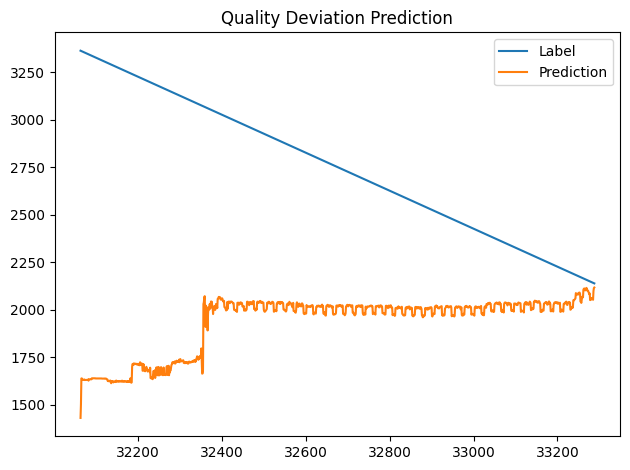

In [26]:
'''Plot result based on last cycle '''
y_last = last_cycle["RUL"]
X_last = last_cycle.drop("RUL",axis=1)

prediction = model.predict(X_last)
prediction = prediction.flatten()
#prediction = [0 if x[0] > 0.5 else 1 for x in prediction]
print("RMSE last_cycle: {}".format(np.sqrt(mean_squared_error(y_last, prediction))))

df = pd.DataFrame({'Label': y_last, 'Prediction': prediction})

plt.plot(df['Label'], label='Label')
plt.plot(df['Prediction'], label='Prediction')

plt.title("Quality Deviation Prediction")
plt.tight_layout()
plt.legend()
plt.savefig("quality_prediction.png")
plt.show()


In [ ]:
''' Check for overfitting '''
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

results = model.evals_result()
epochs = len(results['validation_0']['rmse'])

x_axis = range(0, epochs);
fig, ax = plt.subplots(1, 1, figsize=(10,5));
ax.plot(x_axis, results['validation_0']['rmse'], label='Train');
ax.plot(x_axis, results['validation_0']['rmse'], label='Val');
ax.legend();
ax.set_title('XGBoost RMSE');
ax.set_ylabel('RMSE');
ax.set_xlabel('Number of gradient boosted trees');
plt.show();
plt.tight_layout();